<a href="https://colab.research.google.com/github/nanpiyaporn/100daysPython/blob/main/wmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Buy or sell WMT**

***members:***

*   Eamon Block
*   Sarah Bogert
*   Langsheng Huang
*   Meredith Parry
*   Piyaporn Puangprasert
*   Aditi Nori



Today: 12/1/2024

WMT 5 years Stock data date 10/30/2019-11/29/2024

Download from https://www.marketwatch.com/investing/stock/wmt/download-data?startDate=10/30/2019&endDate=11/29/2024

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
#Data
df = pd.read_csv('wmt2024data5y.csv', parse_dates = True, index_col='Date')
print(df)


            Close    Volume   Open   High    Low
Date                                            
2024-11-29  92.50  11041180  92.26  92.64  91.82
2024-11-27  91.88  14358860  92.00  92.25  91.31
2024-11-26  91.31  16657020  89.89  91.88  89.84
2024-11-25  89.50  25078631  90.50  90.95  89.06
2024-11-22  90.44  23990650  89.41  90.91  88.93
...           ...       ...    ...    ...    ...
2019-11-22  39.79  11530555  40.05  40.10  39.76
2019-11-21  39.95  12908536  39.61  40.00  39.56
2019-11-20  39.71  15233270  40.07  40.16  39.47
2019-11-19  39.96  11148679  40.04  40.12  39.90
2019-11-18  40.08  19648901  39.48  40.29  39.41

[1267 rows x 5 columns]


In [ ]:
# prompt: how to covert date from last one first

df = df.sort_index(ascending=True)
df

,Close,Volume,Open,High,Low
Date,,,,,
2019-11-18,40.08,19648901,39.48,40.29,39.41
2019-11-19,39.96,11148679,40.04,40.12,39.90
2019-11-20,39.71,15233270,40.07,40.16,39.47
2019-11-21,39.95,12908536,39.61,40.00,39.56
2019-11-22,39.79,11530555,40.05,40.10,39.76
...,...,...,...,...,...
2024-11-22,90.44,23990650,89.41,90.91,88.93
2024-11-25,89.50,25078631,90.50,90.95,89.06
2024-11-26,91.31,16657020,89.89,91.88,89.84


In [ ]:
#Simulation parametr
num_simulations = 1000
forecast_day = 365

In [ ]:
#Initialize the simulation array with all zero
simulations=np.zeros((num_simulations, forecast_day))

In [ ]:
# prompt: how to get the last price in df['Close']

last_price = df['Close'].iloc[-1]
last_price

92.5

In [ ]:
#Caculate the daily return and drop and remove NA value
daily_return = df['Close'].pct_change().dropna()


In [ ]:
#Looping through the number of simulation to forecate future price
for i in range(num_simulations):

    cumulative_return = np.random.choice(daily_return, size = forecast_day, replace = True).cumsum()
    #Calculate the future prices
    future_price = last_price * (1+cumulative_return)
    #Storing the future in the simulation
    simulations[i, :] = future_price


In [ ]:
#Print the simulation
print(simulations)

[[ 93.49526576  93.79730658  93.44632739 ... 149.08854416 148.38189787
  148.58065163]
 [ 93.66131925  92.13436542  93.35641827 ... 105.96134905 105.21508039
  104.44767853]
 [ 94.58915896  94.91145861  93.34445089 ... 124.69247279 124.18266238
  124.29987463]
 ...
 [ 90.97304617  90.59366511  90.36335728 ... 140.73862654 141.80656615
  141.33112354]
 [ 91.79103683  91.29489866  92.29016443 ... 136.14382661 137.92226071
  137.86449635]
 [ 91.66575011  91.518958    91.89650902 ... 112.99289585 112.04199909
  110.29255754]]


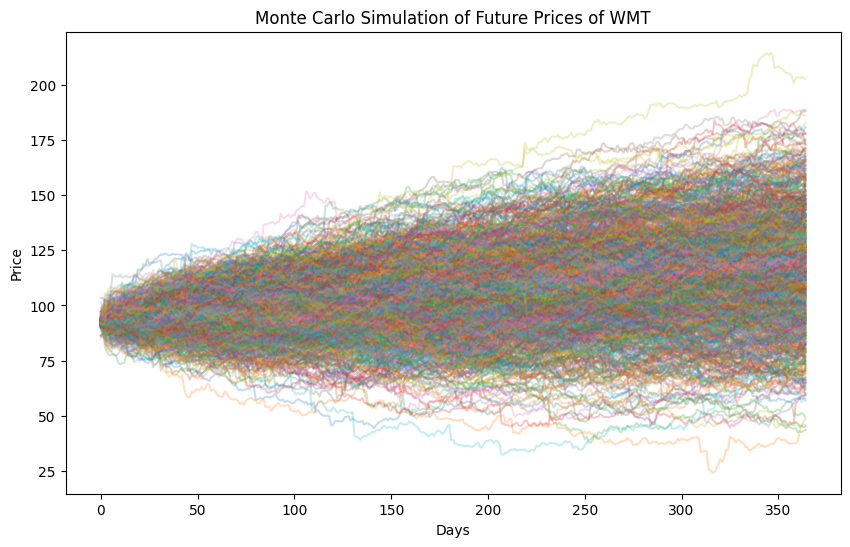

In [ ]:
#plot the result AKA all the simulation
plt.figure(figsize=(10,6))
for i in range(num_simulations):
  plt.plot(simulations[i],alpha=0.25)
plt.title('Monte Carlo Simulation of Future Prices of WMT')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()



In [ ]:
#Calculate
expected_future_price = np.mean(simulations[:, -1])
print('Expexted Future Price of WMT in ',forecast_day,'days (12/1/2025):', round(expected_future_price,2))

Expexted Future Price of WMT in  365 days (12/1/2025): 117.3


In [ ]:
# prompt: how to get the result in next year around 150 instead of 117.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# ... (your existing code)

# Calculate the daily return and drop and remove NA value
daily_return = df['Close'].pct_change().dropna()

# Adjust the forecast horizon and simulation parameters to target a higher expected price
forecast_day = 365  # Still 1 year into the future
num_simulations = 5000  # Increase simulations for better accuracy
target_price = 150  # Specify the target price


# Function to adjust drift to achieve a desired target price
def adjust_drift(returns, target_price, last_price, forecast_day):
    # Initial drift calculation (based on historical returns)
    drift = returns.mean()
    # Iterate to find the suitable adjustment factor for drift
    for k in range(10000): #adjust this for precision, a higher number gives you a more accurate drift
        future_prices = last_price * (1 + np.cumsum(np.random.choice(returns, forecast_day, replace=True)) + drift * np.arange(1,forecast_day+1))
        mean_future_price = np.mean(future_prices[-1])
        # If the mean future price is close enough to the target, return the adjusted drift
        if abs(mean_future_price-target_price) < 0.1:
            break
        drift = drift + (target_price - mean_future_price) / mean_future_price /forecast_day
    return drift

# Adjust the drift using the function
drift = adjust_drift(daily_return, target_price, last_price, forecast_day)
# Looping through the number of simulation to forecast future price with the drift applied
simulations = np.zeros((num_simulations, forecast_day))
for i in range(num_simulations):
    future_prices = last_price * (1 + np.cumsum(np.random.choice(daily_return, forecast_day, replace=True)) + drift * np.arange(1,forecast_day+1))
    simulations[i, :] = future_prices

# ... (rest of your existing code for plotting and printing results)

# Calculate
expected_future_price = np.mean(simulations[:, -1])
print('Expected Future Price of WMT in ', forecast_day, 'days (approximately 12/1/2025):', round(expected_future_price, 2))